In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('Documents/dataset/titanic_train.csv')
#gives the first 5 records 
titanic_df.head(10)

#column sib sp - sibling,spouse
#parch   - parent, child
#Embarked : S-Southampton, C-Cherbourg, Q-Queenstown

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_df.shape

(891, 12)

In [4]:
#since the columns passengerId, Name, Ticket and Cabin are irrelevant in this case, we could drop them

titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 'columns', inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
#to check for missing fields

titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [6]:
titanic_df = titanic_df.dropna()

In [7]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

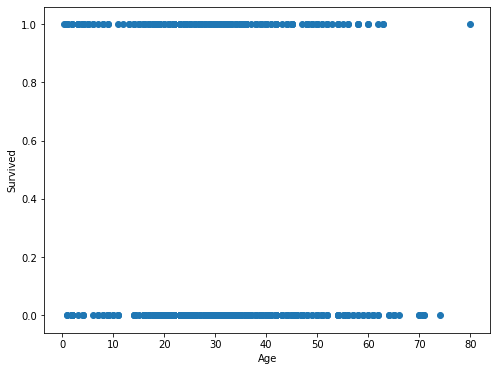

In [9]:
#plotting scatter plot

fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(titanic_df['Age'], titanic_df['Survived'])

plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

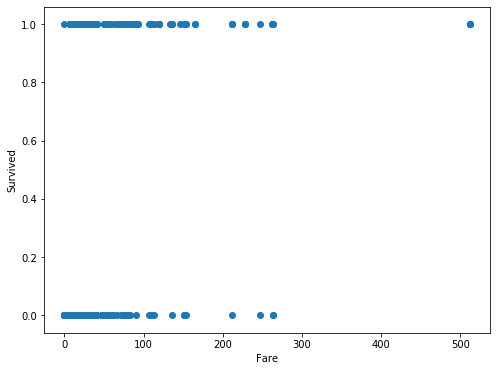

In [10]:
#plotting scatter plot

fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(titanic_df['Fare'], titanic_df['Survived'])

plt.xlabel('Fare')
plt.ylabel('Survived')

In [11]:
#crosstab function in pandas will setup a matrix for all possible values

pd.crosstab(titanic_df['Sex'],titanic_df['Survived'] )

Survived,0,1
Sex,,
female,64,195
male,360,93


In [12]:
pd.crosstab(titanic_df['Pclass'],titanic_df['Survived'] )

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [13]:
titanic_df_corelation = titanic_df.corr()
titanic_df_corelation

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


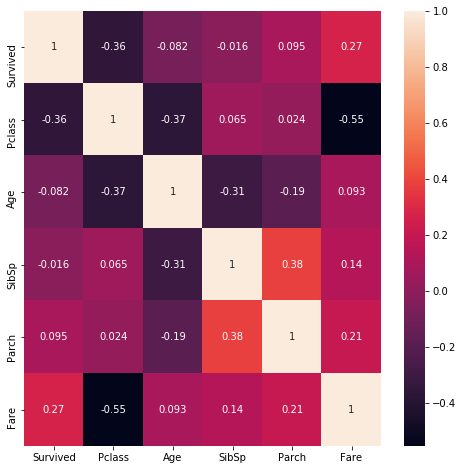

In [14]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(titanic_df_corelation, annot=True)

In [15]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

In [16]:
#Label encoding is typically used with ordinal data. i.e, data that has an inherent order.

titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [17]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [18]:
#categories with no intrinsic order can be converted to numeric values using one-hot encoding.

titanic_df = pd.get_dummies(titanic_df, columns = ['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [19]:
#frac=1 returns all of the original records. Shuffling the dataset and storing in a csv file.

titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,16.0,0,0,8.0500,0,0,1
1,0,3,1,20.0,0,0,8.0500,0,0,1
2,1,2,0,32.0,0,0,13.0000,0,0,1
3,1,1,0,45.0,1,1,164.8667,0,0,1
4,0,1,1,62.0,0,0,26.5500,0,0,1


In [20]:
titanic_df.to_csv('Documents/dataset/titanic_processed.csv', index=False)

In [21]:
titanic_df_processed = pd.read_csv('Documents/dataset/titanic_processed.csv')


In [22]:
X = titanic_df_processed.drop('Survived', axis=1)

Y = titanic_df_processed['Survived']

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=0 )

In [24]:
x_train.shape, x_test.shape

((569, 9), (143, 9))

In [25]:
from sklearn.linear_model import LogisticRegression
#Solver specifies to scikit learn the alogirthm that it should use under the hood to solve this logistic regression optimization problem.
#The algorithm to use in the optimization problem - the liblinear solver is a good choice for small datasets 
#and binary classification.
#penalty= L2 regularize the model by applying a penalty on overly complex models. It is a method using in machine learning to
#penalize complex models so the resulting model is more robust and better for prediction. The L2 penalty uses the L2 norm of the
#Coefficients of your model as the penalty function. It is simply the sum of the squares of the coefficients.
#C is used to specify the strength of your regularization.C stands for inverse of regularization strength.
#Smaller values indicate stronger regularization.

logistic_model = LogisticRegression(penalty= 'l2', C=1.0, solver= 'liblinear').fit(x_train, y_train)
logistic_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
#R-square is the measure of how well our linear model captures the underlying variation in our training data.

print("Training Score : ", logistic_model.score(x_train, y_train))

Training Score :  0.8154657293497364


In [27]:
y_pred=logistic_model.predict(x_test)

In [28]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [48]:
#create a dataframe to view the predicted and the actual scores.

y_pred_actual = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

y_pred_actual.head(10)

,y_test,y_pred
338,1,1
142,1,1
242,0,0
235,0,0
468,0,0
470,0,0
375,0,0
40,1,0
365,1,1
85,0,0


In [49]:
titanic_crosstab = pd.crosstab(y_pred_actual.y_pred, y_pred_actual.y_test)
titanic_crosstab



y_test,0,1
y_pred,,
0,68,24
1,14,37


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [41]:
model_accuracy = accuracy_score(y_test, y_pred)
model_precesion = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)


#Accuracy is: " how many of the model's classifications were actually correct? "
print("Accuracy of the model is {}%" .format(model_accuracy*100))

#Precision is: " how many of the model's positive classifications of diabetes were correct? 
print("Precesion of the model is {}%" .format(model_precesion*100))

#Recall is: " how many of the individuals with diabetes correctly  classified by the model? 
print("Recall of the model is {}%" .format(model_recall*100))

Accuracy of the model is 73.42657342657343%
Precesion of the model is 72.54901960784314%
Recall of the model is 60.65573770491803%


In [42]:
titanic_crosstab

y_test,0,1
y_pred,,
0,68,24
1,14,37


In [43]:
TP = titanic_crosstab[1][1]
TN = titanic_crosstab[0][0]
FP = titanic_crosstab[0][1]
FN = titanic_crosstab[1][0]

In [35]:
accuracy_score_verified = (TP+TN)/(TP+TN+FP+FN)
accuracy_score_verified

0.7342657342657343

In [36]:
precision_score_verified = TP/(TP+FP)
precision_score_verified

0.7254901960784313

In [37]:
recall_score_verified = TP/(TP+FN)
recall_score_verified

0.6065573770491803